### Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('tips.csv')

In [3]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#Checking for missing values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


In [9]:
data.drop_duplicates(inplace= True)

In [10]:
data.duplicated().sum()

0

<Axes: xlabel='day'>

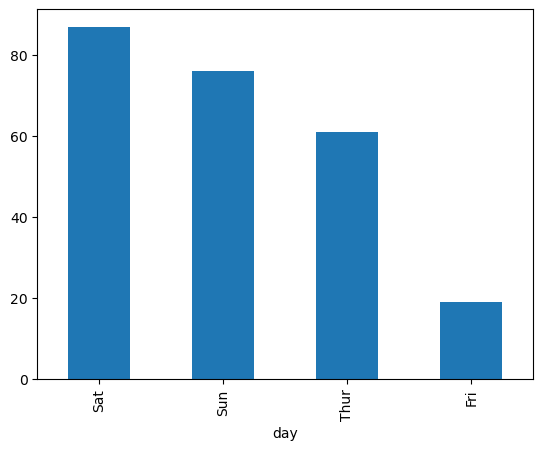

In [11]:
data['day'].value_counts().plot.bar()

In [12]:
data.max().reset_index(name= 'value')

,index,value
0,total_bill,50.81
1,tip,10.0
2,sex,Male
3,smoker,Yes
4,day,Thur
5,time,Lunch
6,size,6


In [13]:
data.groupby('day')['tip'].sum().reset_index(name='sum').sort_values(by='sum' , ascending=False)

,day,sum
1,Sat,260.40
2,Sun,247.39
3,Thur,169.83
0,Fri,51.96


In [14]:
data['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

#### Data Encoding (Converting Categorical to Numeric)


In [15]:
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [17]:
print("Encoded Data:\n")
data.head()

Encoded Data:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### Exploratory Data Analysis (EDA)

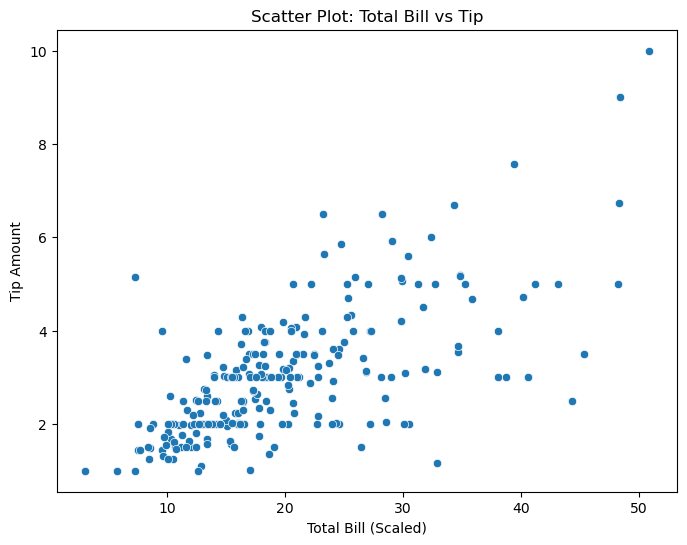

In [18]:
# 1. Scatter Plot - Total Bill vs Tip
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill (Scaled)')
plt.ylabel('Tip Amount')
plt.show()

##### The scatter plot indicates a positive relationship between 'total_bill' and 'tip'. Higher total bills tend to result in higher tips, suggesting a linear relationship.

In [19]:
correlation = data['total_bill'].corr(data['tip'])
print("Correlation coefficient between total bill and tip:\n", correlation)

Correlation coefficient between total bill and tip:
 0.6749978565456074


<Figure size 1000x800 with 0 Axes>

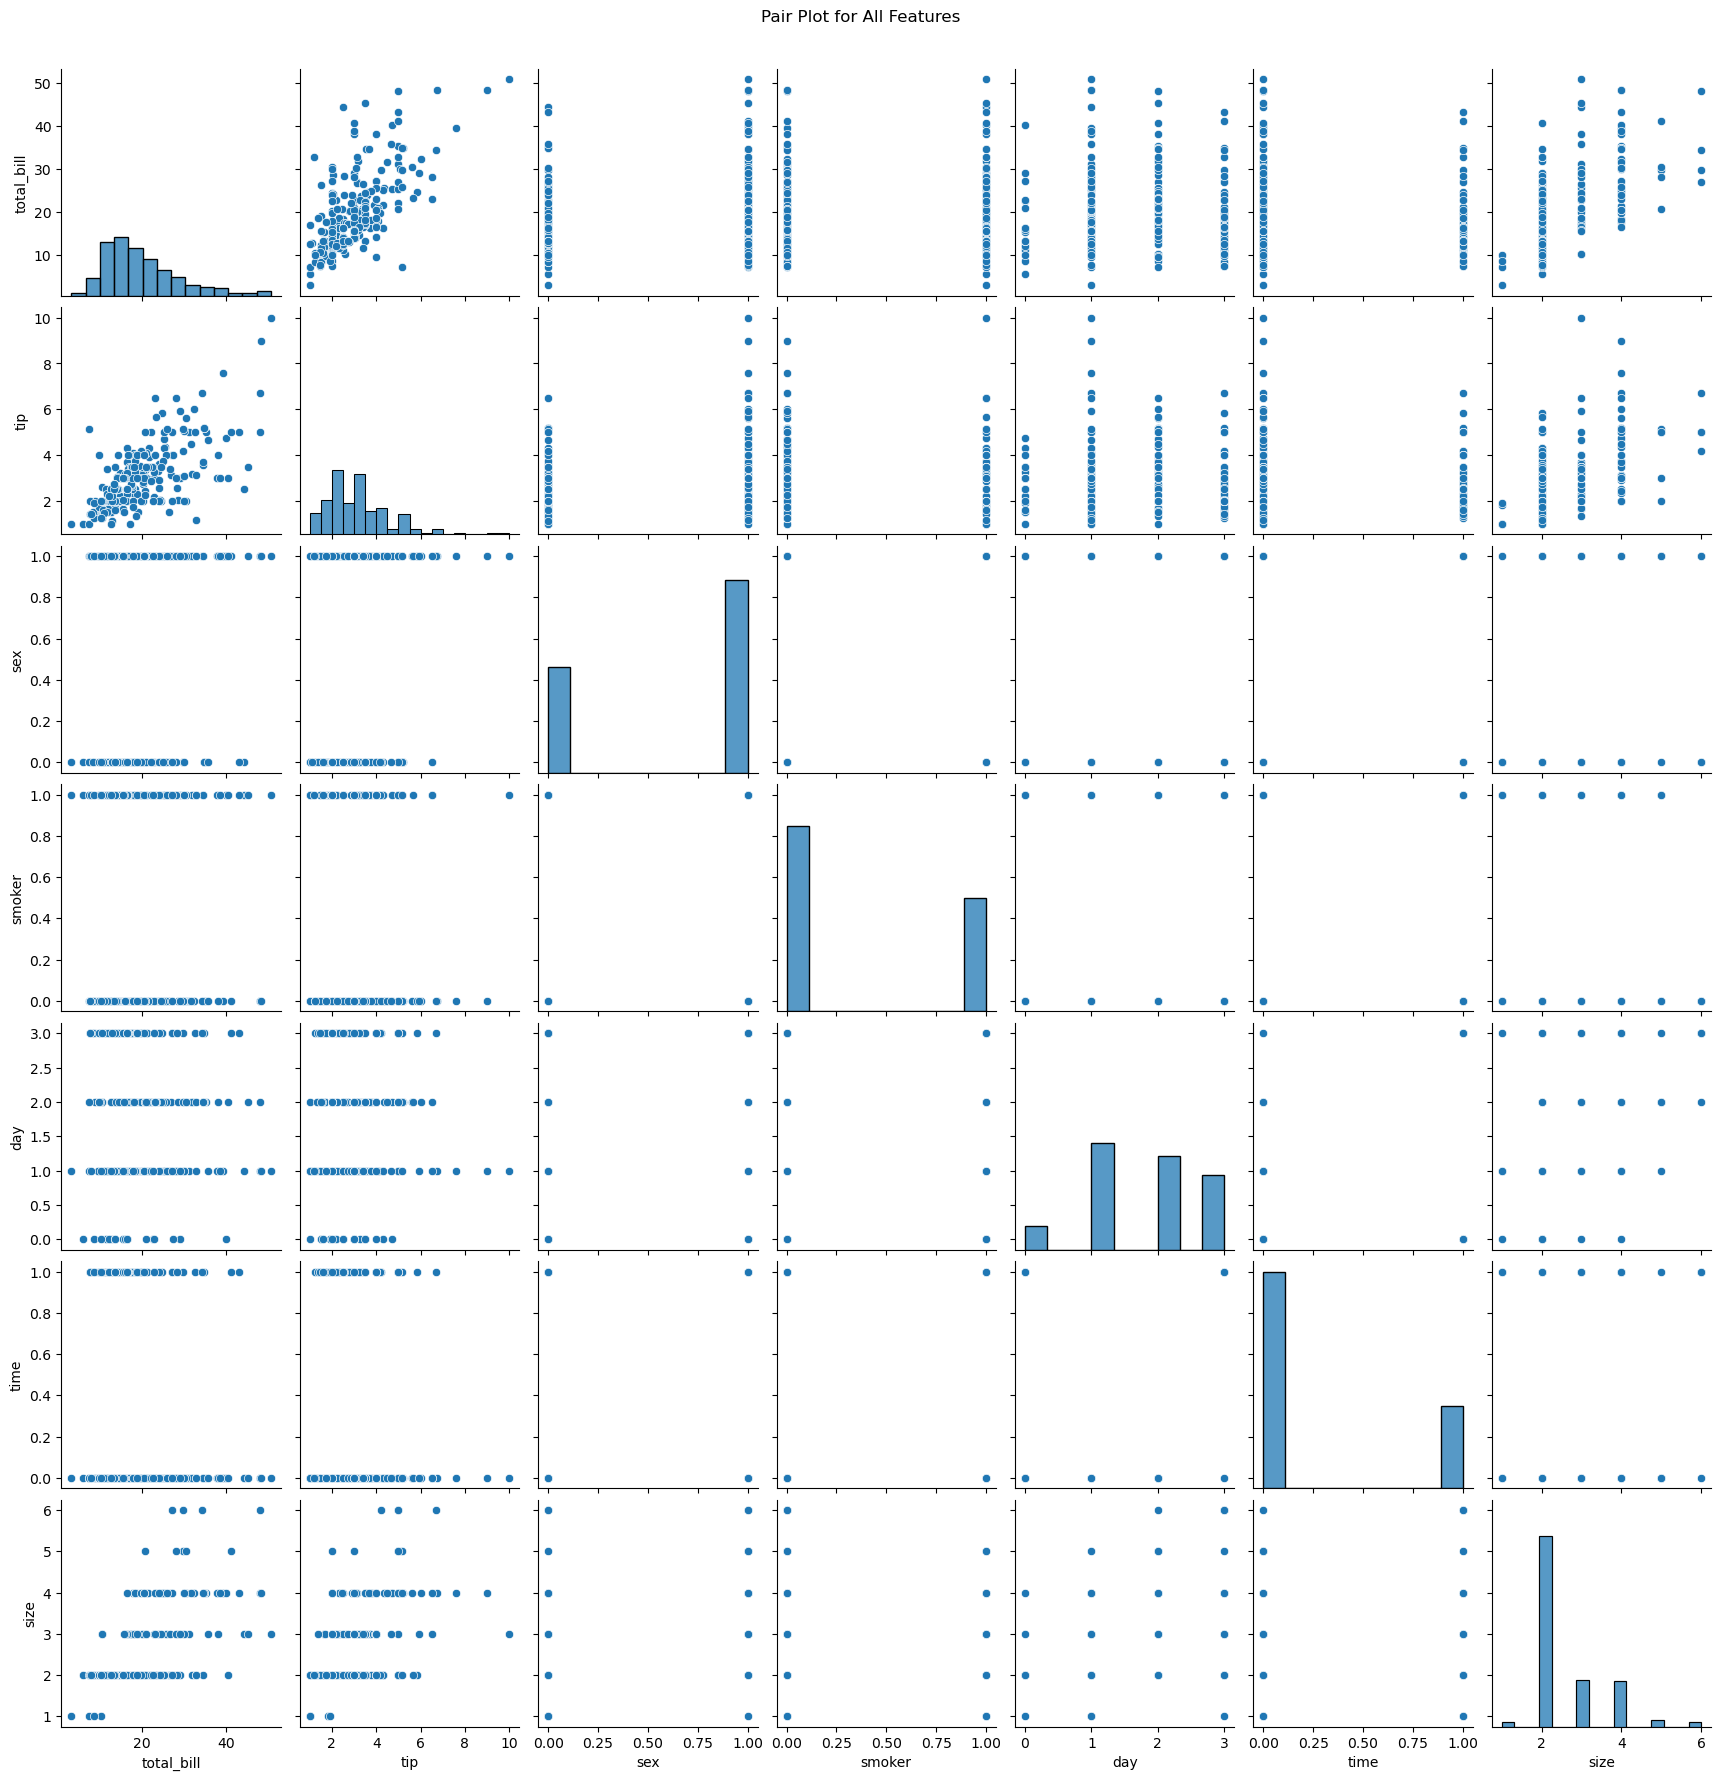

In [20]:
# 2. Pair Plot for Multiple Features
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.suptitle('Pair Plot for All Features', y=1.02)
plt.show()

#### Analysis from pair plot:
- There is a noticeable positive linear relationship between total_bill and tip. As the total bill amount increases, the tip amount generally increases, suggesting that customers tend to tip more with higher bills.
- The scatter plot between size and tip suggests a slight positive trend, indicating that larger groups might tend to give higher tips. However, the pattern is less consistent compared to total_bill.
- There doesn't seem to be a significant variation in tip amounts based on gender. The distribution for both categories (male and female) shows similar patterns, suggesting that sex might not have a strong influence on tip prediction.
- There is a slight difference in tip distributions between smokers and non-smokers, but it is not very pronounced. We may keep it for further analysis but should consider feature importance.
- The distribution of tip across different days appears to be relatively uniform, with no clear pattern that strongly separates days by tipping behavior. This suggests day might not be a strong predictor, but further tests may help confirm this.
- There is a clear division between lunch and dinner times. Tips appear to vary more during dinner hours compared to lunch, which indicates that time could be important for predicting tip amounts.
- A slight positive correlation is observed between total_bill and size, which makes sense as larger parties tend to generate higher total bills.



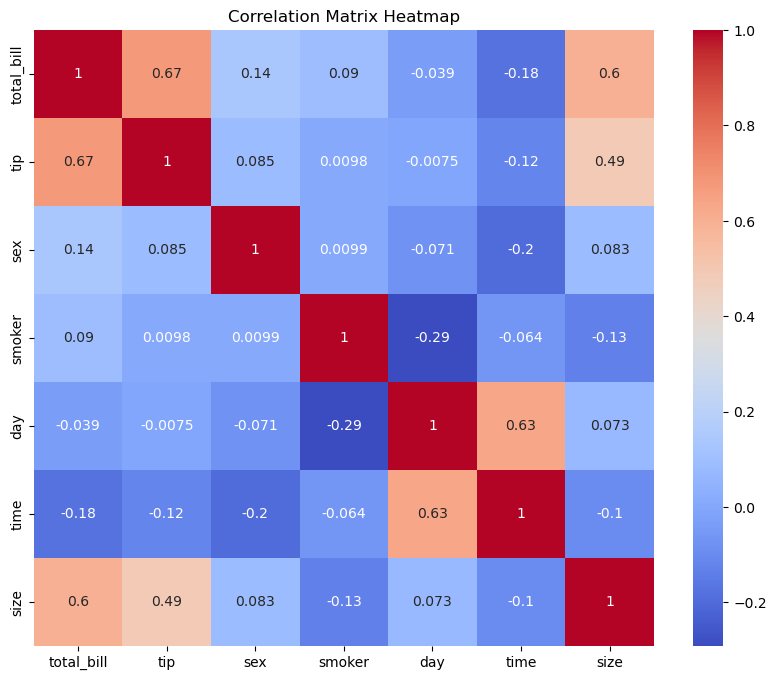

In [21]:
# 3. Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

##### The heatmap shows the correlation strength between features. 'total_bill' is strongly correlated with 'tip', while 'size' also shows some correlation. Other features have weaker correlations.

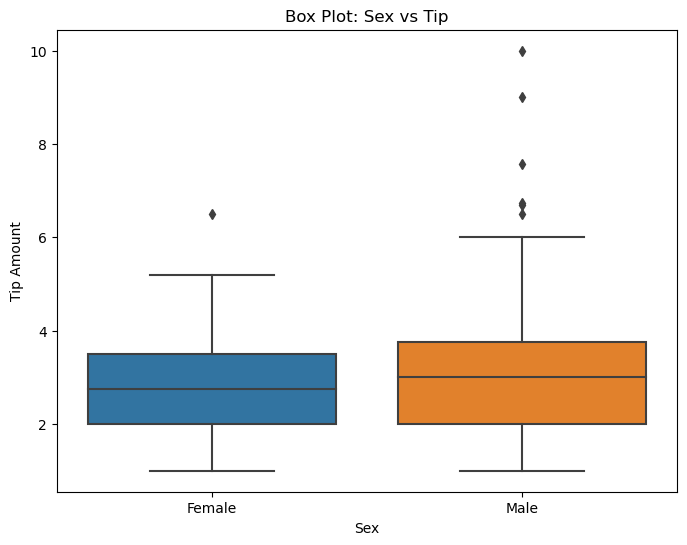

In [22]:
# 4. Checking Categorical Distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='tip')
plt.title('Box Plot: Sex vs Tip')
plt.xlabel('Sex')
plt.ylabel('Tip Amount')
plt.xticks(ticks=[0, 1], labels=label_encoders['sex'].classes_)
plt.show()

##### The box plot shows differences in the distribution of tips given by male and female customers. The median tip amount does not vary significantly based on sex.

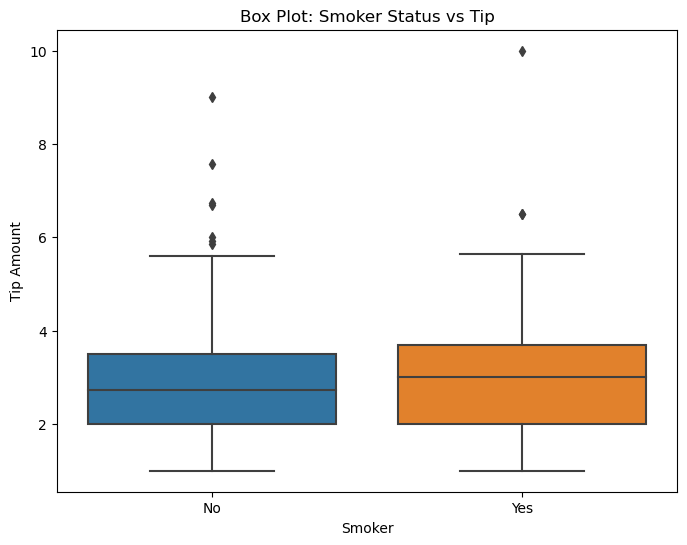

In [23]:
# 5. Box Plot: Smoker Status vs Tip
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='smoker', y='tip')
plt.title('Box Plot: Smoker Status vs Tip')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.xticks(ticks=[0, 1], labels=label_encoders['smoker'].classes_)
plt.show()

##### There appears to be a minor difference in tipping behavior based on smoker status. Non-smokers tend to have a slightly higher median tip.

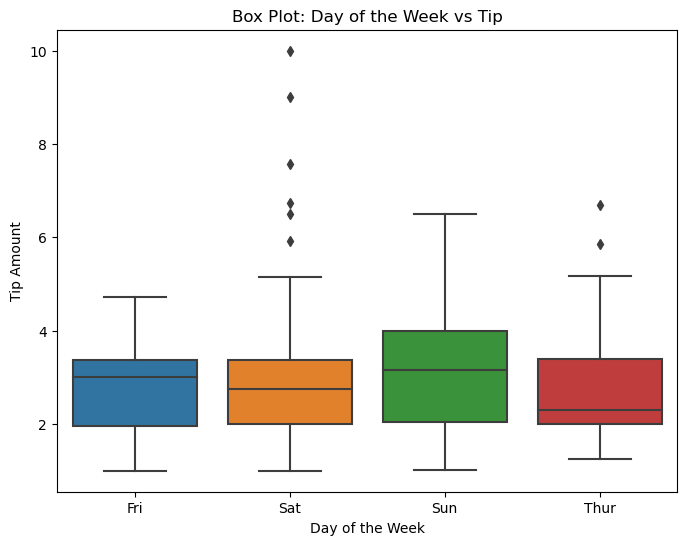

In [24]:
# 6. Day vs Tip Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='day', y='tip')
plt.title('Box Plot: Day of the Week vs Tip')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.xticks(ticks=[0, 1, 2, 3], labels=label_encoders['day'].classes_)
plt.show()

##### The distribution of tips across different days of the week suggests no substantial variance, though certain days may have more outliers.

#### Line Plot for time-series data


In [25]:
df= pd.read_csv('tips.csv')
df['day_numeric'] = df['day'].map({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thur': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7})  # Aggregating tips by 'day'
df_sorted = df.sort_values(by='day_numeric')

# Summing total bill and tip amounts by day
df_grouped = df_sorted.groupby('day_numeric').agg({'total_bill': 'sum', 'tip': 'sum'}).reset_index()

df_grouped = df_grouped[df_grouped['total_bill'] > 0]

df_grouped

,day_numeric,total_bill,tip
0,4,1096.33,171.83
1,5,325.88,51.96
2,6,1778.40,260.40
3,7,1627.16,247.39


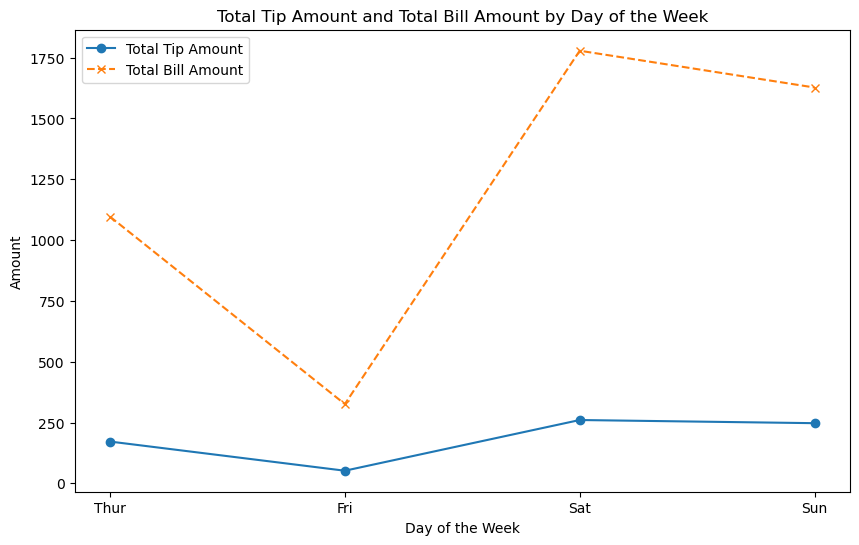

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day_numeric'], df_grouped['tip'], marker='o', linestyle='-', label='Total Tip Amount')
plt.plot(df_grouped['day_numeric'], df_grouped['total_bill'], marker='x', linestyle='--', label='Total Bill Amount')

day_labels = ['Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(df_grouped['day_numeric'], day_labels[:len(df_grouped)]) 

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.title('Total Tip Amount and Total Bill Amount by Day of the Week')
plt.legend()
plt.show()

##### The line plot indicates that there is need to improve services on Friday to improve the tip rate

#### Statistical Test for Linearity: Rainbow Test


In [27]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = data['total_bill']  # Predictor variable
y = data['tip']         # Target variable

In [28]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 

In [29]:
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.3148004591106648
Rainbow Test p-value: 0.06745745436378953


#### The Rainbow test is used to check if a model has a good fit to the data, specifically testing if the model's predicted values align well with the actual values.
- Test Statistic (1.31): This value indicates the strength of the test. Higher values suggest a greater deviation from the null hypothesis (that the model fits well).
- p-value (0.067): This is the probability of observing the test statistic under the assumption that the model fits well. A p-value greater than 0.05 suggests that we fail to reject the null hypothesis, meaning there’s no strong evidence that the model is a poor fit.

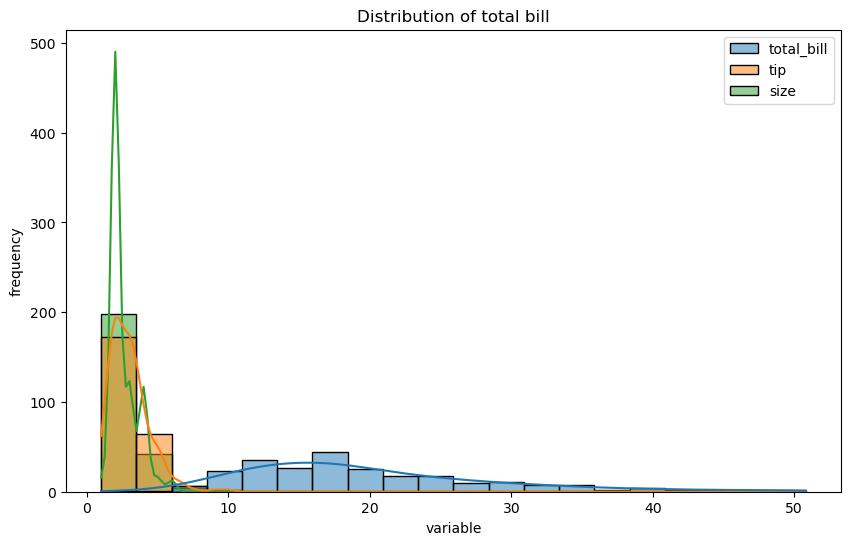

In [30]:
df_bill=pd.read_csv('tips.csv')
plt.figure(figsize=(10,6))
sns.histplot(df_bill, kde=True)
plt.title('Distribution of total bill')
plt.xlabel('variable')
plt.ylabel('frequency')
plt.show()

#### Insights to improve tip rate:
- The business should prioritize offering their best service on Sundays and work on improving service quality on Fridays to increase tip amounts.
- They should also focus on serving customers during dinner time, as it tends to lead to higher tips.
- Larger groups should be given special attention since they are likely to leave higher tips.
- Additionally, the business should pay attention to the total bill amount, as it has a strong relationship with the tips customers leave.



## Model Prediction

#### 1. Linear Regression 

In [113]:
df

,total_bill,tip,sex,smoker,day,time,size,day_numeric
0,16.99,1.01,Female,No,Sun,Dinner,2,7
1,10.34,1.66,Male,No,Sun,Dinner,3,7
2,21.01,3.50,Male,No,Sun,Dinner,3,7
3,23.68,3.31,Male,No,Sun,Dinner,2,7
4,24.59,3.61,Female,No,Sun,Dinner,4,7
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,6
240,27.18,2.00,Female,Yes,Sat,Dinner,2,6
241,22.67,2.00,Male,Yes,Sat,Dinner,2,6
242,17.82,1.75,Male,No,Sat,Dinner,2,6


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [160]:
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
Mean Absolute Error (MAE): 0.66
R-squared (R2): 0.48


#### 2. Ridge and Lasso Regularization

In [161]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [162]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")


Ridge Regression Metrics:
MSE: 0.65, RMSE: 0.81, MAE: 0.66, R2: 0.48


In [163]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [164]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R2: {r2_lasso:.2f}")


Lasso Regression Metrics:
MSE: 0.64, RMSE: 0.80, MAE: 0.66, R2: 0.49


In [165]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [166]:
y_pred_elastic = elastic_reg.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElastic Net Metrics:")
print(f"MSE: {mse_elastic:.2f}, RMSE: {rmse_elastic:.2f}, MAE: {mae_elastic:.2f}, R2: {r2_elastic:.2f}")


Elastic Net Metrics:
MSE: 0.62, RMSE: 0.78, MAE: 0.66, R2: 0.51


#### 3. Decision Tree Regression

In [167]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [168]:
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Metrics:")
print(f"MSE: {mse_tree:.2f}, RMSE: {rmse_tree:.2f}, MAE: {mae_tree:.2f}, R2: {r2_tree:.2f}")



Decision Tree Regression Metrics:
MSE: 1.00, RMSE: 1.00, MAE: 0.82, R2: 0.20


#### 4. Random Forest 

In [169]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [170]:
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Metrics:")
print(f"MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Regression Metrics:
MSE: 0.83, RMSE: 0.91, MAE: 0.74, R2: 0.33


#### 5. Support Vector Regression (SVR)

In [171]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [172]:
y_pred_svr = svr_reg.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression (SVR) Metrics:")
print(f"MSE: {mse_svr:.2f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}, R2: {r2_svr:.2f}")


Support Vector Regression (SVR) Metrics:
MSE: 0.69, RMSE: 0.83, MAE: 0.67, R2: 0.45


#### 6. KNN Regression

In [175]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [176]:
y_pred_knn = knn_reg.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN Regression Metrics:")
print(f"MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}, MAE: {mae_knn:.2f}, R2: {r2_knn:.2f}")


KNN Regression Metrics:
MSE: 0.67, RMSE: 0.82, MAE: 0.68, R2: 0.47


#### Brief Idea on metrics: (taking reference to Elastic Net)
- Mean Absolute Error (MAE): The average absolute difference between the predicted values and the actual values. In this case, the average difference between the predicted tip amounts and the actual tip amounts is approximately 0.66.

- Mean Squared Error (MSE): The average of the squared differences between the predicted values and the actual values. In this case, the average squared difference between the predicted tip amounts and the actual tip amounts is approximately 0.62.

- Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predicted values and the actual values. In this case, the square root of the average squared difference between the predicted tip amounts and the actual tip amounts is approximately 0.78.

- R-squared (R2): Also known as the coefficient of determination, R-squared measures the proportion of variance in the target variable that is explained by the model. In this case, approximately 51% of the variance in the tip amounts is explained by the model.

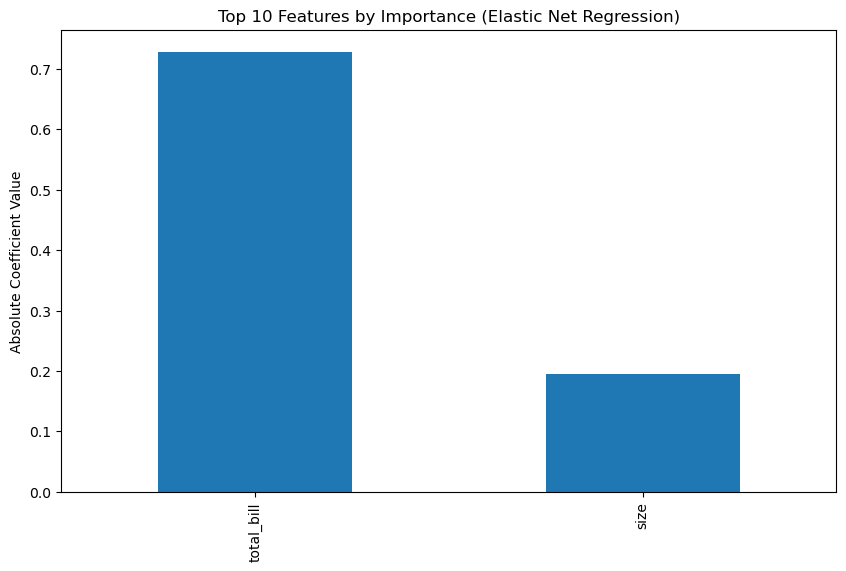


Feature Importance (Coefficients):
total_bill    0.728484
size          0.194366
dtype: float64


In [177]:
# Checking coefficients in Elastic Net model for feature importance
feature_importance = pd.Series(elastic_reg.coef_, index=X_train.columns)
sorted_importance = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features by Importance (Elastic Net Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.show()

print("\nFeature Importance (Coefficients):")
print(sorted_importance)


#### This clearly shows that 'total_bill' has more influence over 'size' in predicting 'tip'.

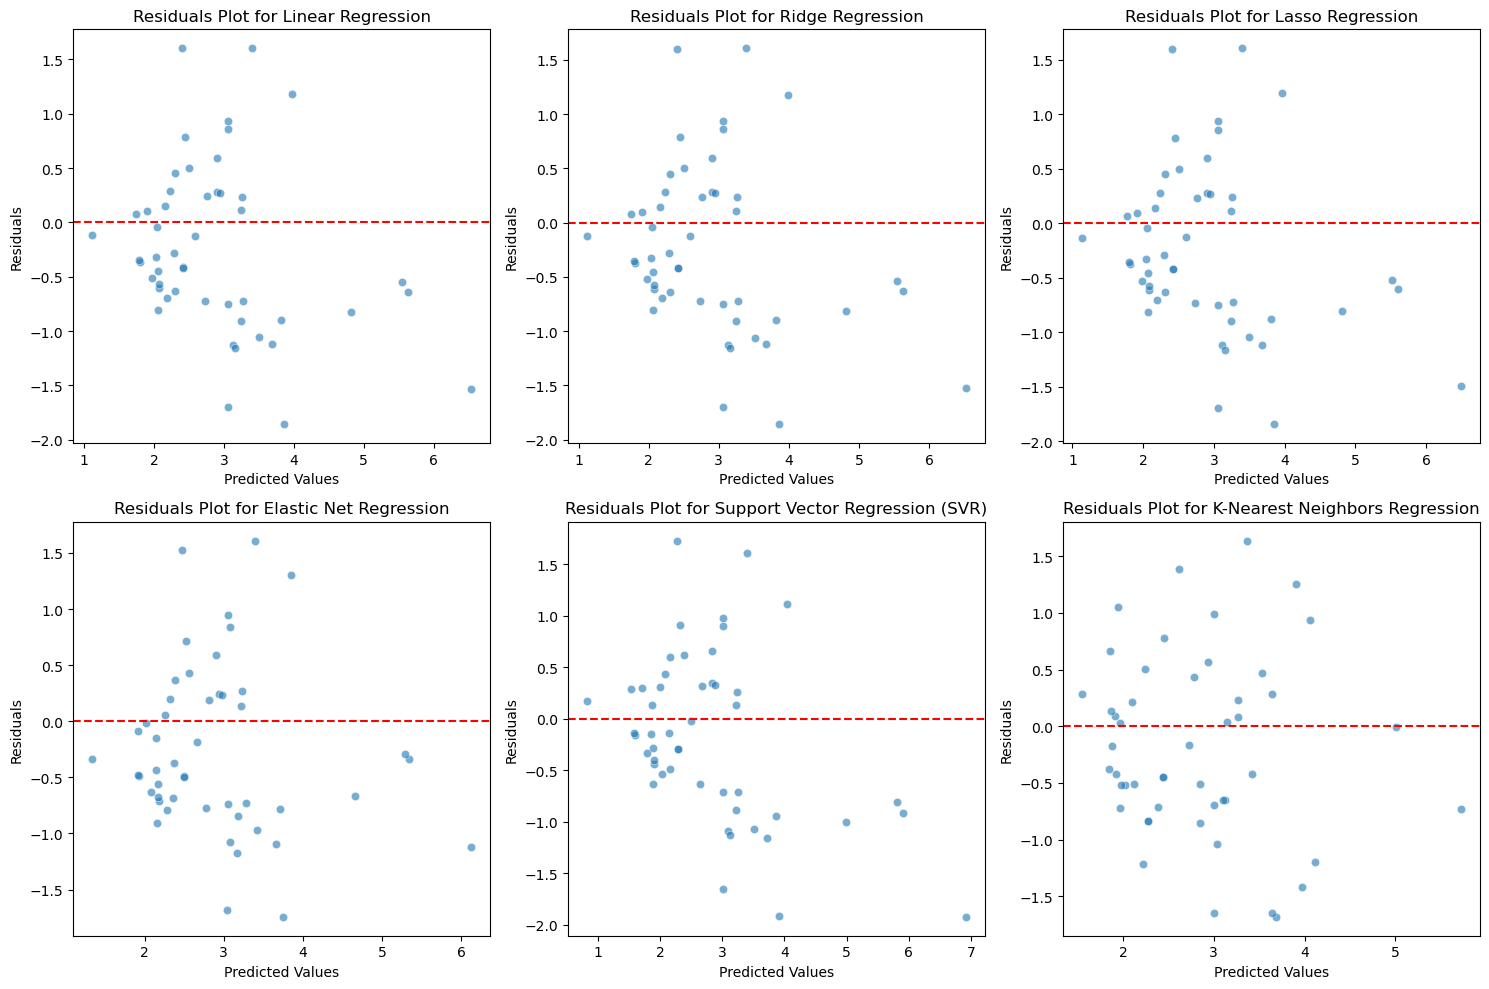

In [178]:
def plot_residuals_subplot(ax, y_test, y_pred, model_name):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals Plot for {model_name}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  

# Linear Regression
y_pred_lr = lin_reg.predict(X_test_scaled) 
plot_residuals_subplot(axes[0], y_test, y_pred_lr, "Linear Regression")

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[1], y_test, y_pred_ridge, "Ridge Regression")

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[2], y_test, y_pred_lasso, "Lasso Regression")

# Elastic Net Regression
y_pred_elastic = elastic_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[3], y_test, y_pred_elastic, "Elastic Net Regression")

# Support Vector Regression
y_pred_svr = svr_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[4], y_test, y_pred_svr, "Support Vector Regression (SVR)")

# K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[5], y_test, y_pred_knn, "K-Nearest Neighbors Regression")

plt.tight_layout()
plt.show()


### Model Comparisions Plot

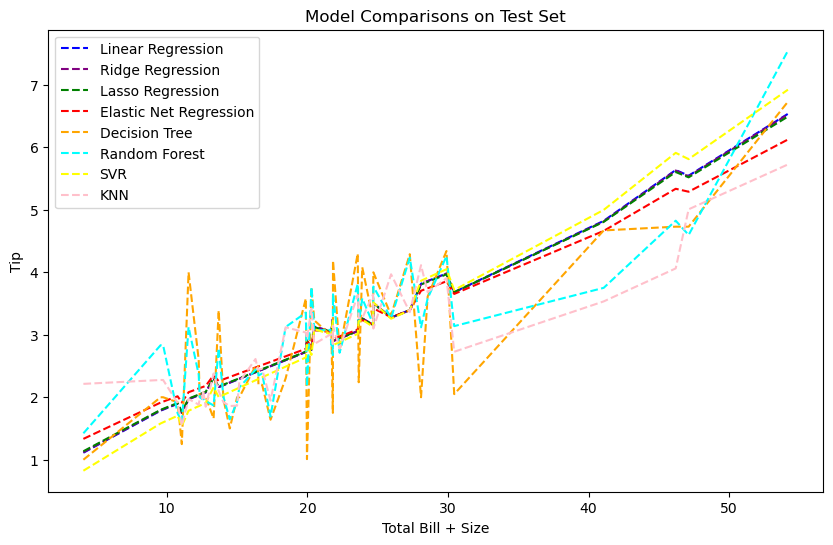

In [179]:
sorted_indices = np.argsort(X_test[['total_bill', 'size']].sum(axis=1))  # Sort based on total_bill + size
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lr[sorted_indices], color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_ridge[sorted_indices], color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lasso[sorted_indices], color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_elastic[sorted_indices], color='red', label='Elastic Net Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_tree[sorted_indices], color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_rf[sorted_indices], color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_svr[sorted_indices], color='yellow', label='SVR', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_knn[sorted_indices], color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Total Bill + Size')
plt.ylabel('Tip')
plt.legend()
plt.show()


## Conclusion Analysis:
1. **Best Performing model**: Based on the metrics provided, Elastic Net Regression appears to be the best performing model due to lowest MSE and highest R2 score.
    - Elastic Net combines the properties of both Lasso and Ridge regularization, effectively reducing overfitting while preserving useful features. This can help generalize better on small datasets, which is crucial in avoiding the model being too sensitive to noise in the data.
    - Elastic Net’s strength lies in its ability to handle datasets where features are highly correlated (like Ridge) while also promoting sparsity in the coefficients (like Lasso). This gives it a better generalization capability, making it more robust to variations in the data than other models.
    - In short, alpha = 0.1 and l1_ratio = 0.9 strike a balance between regularization and retaining important features, helping the model generalize well while keeping it simple.
    
2. **Linear Relationship Insights**: The R-squared (R2) values for models like Linear Regression, Ridge, and Lasso are moderate (around 0.48 to 0.49), suggesting that the dataset does show some linearity, but not entirely. These models work by assuming a linear relationship between features and the target variable (tip amount), and the moderate R2 values indicate that a significant portion of the variance is explained by these models.


3. **Decision Tree and Random Forest Performance**: Decision Trees and Random Forests can easily overfit when the dataset is small or contains noise. These models are highly flexible and, in the case of a small dataset, might "memorize" the training data instead of generalizing well to new, unseen data. This leads to poor out-of-sample performance, as seen in the high MSE and low R2.
    - Random Forest, being an ensemble of Decision Trees, can introduce further complexity. If there isn’t enough data to support such complex models, the increased number of parameters and decision boundaries may lead to overfitting which is clear from the model performance plot.


    
